In [1]:
import numpy as np 
import pandas as pd

In [2]:
store = pd.read_csv("../datasets/store.csv")
df = pd.read_csv("../datasets/train.csv",parse_dates=[2])

/home/rbenemerito/.virtualenvs/mynt/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,4,2015-04-30,6228,650,1,1,0,0
1,2,4,2015-04-30,6884,716,1,1,0,0
2,3,4,2015-04-30,9971,979,1,1,0,0
3,4,4,2015-04-30,16106,1854,1,1,0,0
4,5,4,2015-04-30,6598,729,1,1,0,0


In [4]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [5]:
# check store nan rows
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [6]:
# fillna in store with 0 has better result than median()
store.fillna(0, inplace=True)

In [7]:
df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [8]:
np.sum([df['Sales'] == 0])

154781

Text(0.5, 1.0, 'Store 10 Sales Distribution')

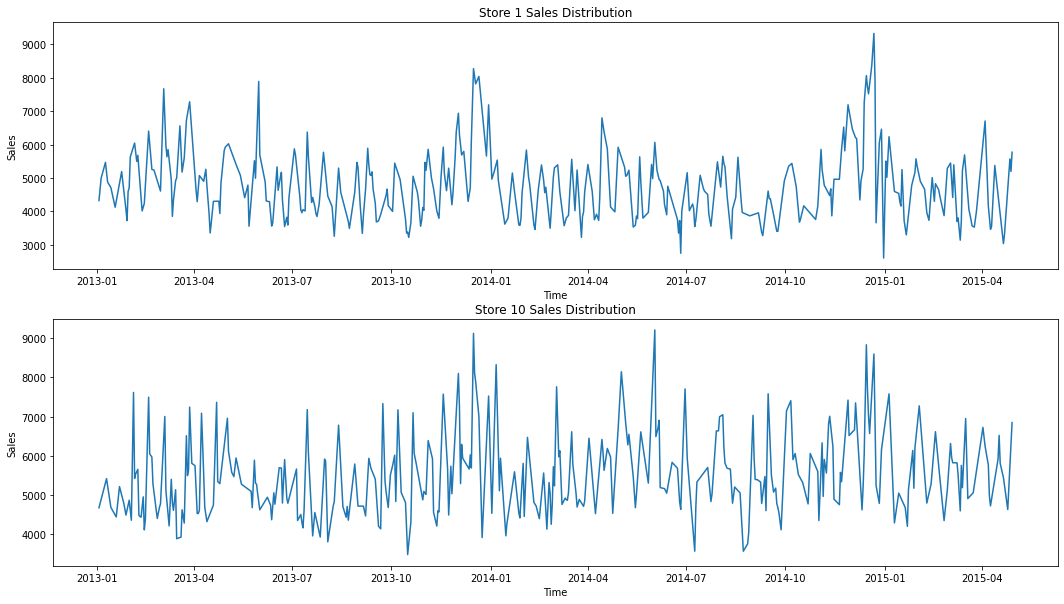

In [9]:
# Check some store sales values
import matplotlib.pyplot as plt
store_1 = df.loc[(df["Store"]==1)&(df['Sales']), ['Date',"Sales"]]
store_10 = df.loc[(df["Store"]==10)&(df['Sales']), ['Date',"Sales"]]
f = plt.figure(figsize=(18,10))
ax1 = f.add_subplot(211)
ax1.plot(store_1['Date'], store_1['Sales'], '-')
ax1.set_xlabel('Time')
ax1.set_ylabel('Sales')
ax1.set_title('Store 1 Sales Distribution')

ax2 = f.add_subplot(212)
ax2.plot(store_10['Date'], store_10['Sales'], '-')
ax2.set_xlabel('Time')
ax2.set_ylabel('Sales')
ax2.set_title('Store 10 Sales Distribution')

In [10]:
# merge df with store 
merged = pd.merge(df, store, on='Store')
merged = merged.sort_values(['Date'],ascending = False)

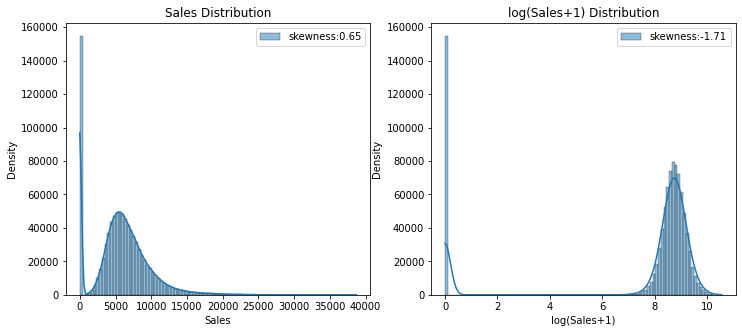

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# check distribution of sales in train set
# we have outliers, obviously if store is closed they will have 0 sales.
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
g1 = sns.histplot(merged['Sales'],bins = 100, kde=True, label='skewness:{:.2f}'.format(merged['Sales'].skew()),ax = ax1)
g1.legend()
g1.set(xlabel = 'Sales', ylabel = 'Density', title = 'Sales Distribution')
g2 = sns.histplot(np.log1p(merged['Sales']), bins=100, kde=True,label='skewness:{:.2f}'.format(np.log1p(merged['Sales']).skew()),ax=ax2)
g2.legend()
g2.set(xlabel = 'log(Sales+1)',ylabel = 'Density', title = 'log(Sales+1) Distribution')
plt.show()

In [12]:
# only use data of Sales>0 and Open is 1
merged = merged[(merged.Open != 0)&(merged.Sales >0)]

In [13]:
merged.loc[:,"StateHoliday"] = df.StateHoliday.apply(lambda x: '0' if x == 0 else x)
merged.StateHoliday.astype('category')
merged.Promo.astype('category')
merged.SchoolHoliday.astype('category')
merged.Store.astype('category')

0           1
312626    382
354136    433
259812    319
466056    569
         ... 
274261    335
289009    353
224251    274
211685    259
214235    262
Name: Store, Length: 759848, dtype: category
Categories (1115, int64): [1, 2, 3, 4, ..., 1112, 1113, 1114, 1115]

In [14]:
X = merged[['Date', 'Store', 'Customers', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear']  ]
Y = np.log1p(merged["Sales"])

In [15]:
X["Month"] = X.Date.dt.month
X["Year"] = X.Date.dt.year
X["Day"] = X.Date.dt.day
X['WeekOfYear'] = X.Date.dt.weekofyear
X.drop(columns = ['Date'], inplace=True)

/home/rbenemerito/.virtualenvs/mynt/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/rbenemerito/.virtualenvs/mynt/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/rbenemerito/.virtualenvs/mynt/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isoca

In [16]:
mappings = {'0':0, 'a':1, 'b':2, 'c':3, 'd':4}
X.StoreType.replace(mappings, inplace=True)
X.Assortment.replace(mappings, inplace=True)
X.StateHoliday.replace(mappings, inplace=True)

In [17]:
# calculate competiter open time in months
X['CompetitionOpen'] = 12 * (X.Year - X.CompetitionOpenSinceYear) + \
    (X.Month - X.CompetitionOpenSinceMonth)
X['CompetitionOpen'] = X['CompetitionOpen'].apply(lambda x: x if x > 0 else 0)

# calculate promo2 open time in months
X['PromoOpen'] = 12 * (X.Year - X.Promo2SinceYear) + \
    (X.WeekOfYear - X.Promo2SinceWeek) / 4.0
X['PromoOpen'] = X['PromoOpen'].apply(lambda x: x if x > 0 else 0)

In [18]:
# Use the last 25% of the data as a validation set
train_percentage = 0.25
train_size = int(df.shape[0] * train_percentage)

X_train = X[train_size:]
X_val = X[:train_size] 
y_train = Y[train_size:]
y_val = Y[:train_size]

In [19]:
X_train

,Store,Customers,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Month,Year,Day,WeekOfYear,CompetitionOpen,PromoOpen
910648,1111,546,1,1,0,1,1,1,1900.0,6.0,2014.0,1,31.0,2013.0,8,2014,4,32,2.0,12.25
301845,369,635,1,1,0,1,4,3,5870.0,4.0,2014.0,0,0.0,0.0,8,2014,4,32,4.0,24176.00
669511,818,961,1,1,0,1,4,1,490.0,0.0,0.0,1,35.0,2010.0,8,2014,4,32,24176.0,47.25
647481,791,1075,1,1,0,1,1,1,5950.0,4.0,2007.0,0,0.0,0.0,8,2014,4,32,88.0,24176.00
851656,1039,1686,1,1,0,1,1,3,70.0,6.0,1990.0,1,22.0,2012.0,8,2014,4,32,290.0,26.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274261,335,482,2,0,0,1,2,1,90.0,0.0,0.0,1,31.0,2013.0,1,2013,1,1,24157.0,0.00
289009,353,820,2,0,0,1,2,2,900.0,0.0,0.0,1,14.0,2013.0,1,2013,1,1,24157.0,0.00
224251,274,729,2,0,0,1,2,2,3640.0,0.0,0.0,1,10.0,2013.0,1,2013,1,1,24157.0,0.00
211685,259,1444,2,0,0,1,2,2,210.0,0.0,0.0,0,0.0,0.0,1,2013,1,1,24157.0,24156.25


In [20]:
# define eval metrics, metric used in kaggle
def rmspe(y, yhat):
    return np.sqrt(np.mean((yhat/y-1) ** 2))

def rmspe_xg(yhat, y):
    y = np.expm1(y.get_label())
    yhat = np.expm1(yhat)
    return "rmspe", rmspe(y,yhat)

In [21]:
X_val

,Store,Customers,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Month,Year,Day,WeekOfYear,CompetitionOpen,PromoOpen
0,1,650,4,1,0,0,3,1,1270.0,9.0,2008.0,0,0.0,0.0,4,2015,30,18,79.0,24184.50
312626,382,903,4,1,0,0,3,3,26130.0,11.0,2002.0,0,0.0,0.0,4,2015,30,18,149.0,24184.50
354136,433,820,4,1,0,0,1,3,30030.0,11.0,2010.0,0,0.0,0.0,4,2015,30,18,53.0,24184.50
259812,319,1062,4,1,0,0,1,3,570.0,9.0,2012.0,1,27.0,2012.0,4,2015,30,18,31.0,33.75
466056,569,819,4,1,0,0,1,1,1340.0,9.0,2006.0,0,0.0,0.0,4,2015,30,18,103.0,24184.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264331,324,920,1,1,0,1,1,1,13140.0,0.0,0.0,1,14.0,2011.0,8,2014,4,32,24176.0,40.50
804679,982,1080,1,1,0,1,4,1,21930.0,0.0,0.0,0,0.0,0.0,8,2014,4,32,24176.0,24176.00
23517,29,926,1,1,0,1,4,3,2170.0,0.0,0.0,0,0.0,0.0,8,2014,4,32,24176.0,24176.00
211955,260,1057,1,1,0,1,1,1,540.0,10.0,2011.0,0,0.0,0.0,8,2014,4,32,34.0,24176.00


In [22]:
import wandb
from wandb.xgboost import wandb_callback
wandb_config = {
    "Model": "RF Regressor with Customers"
}
wandb.init(project="mynt-rossmann",name="RF-2020-10-27")


wandb: Currently logged in as: rbenemerito (use `wandb login --relogin` to force relogin)


In [23]:
# try random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

clf = RandomForestRegressor(n_estimators = 15, max_depth=16)
# clf = LinearRegression()
clf.fit(X_train, y_train)
# validation
y_pred = clf.predict(X_val)
rmspe_result = rmspe(np.expm1(y_val), np.expm1(y_pred))
print('RMSPE: {:.4f}'.format(rmspe_result))
rmse_result = mean_squared_error(np.expm1(y_val), np.expm1(y_pred), squared=False)
print('RMSE: {:.4f}'.format(rmse_result))
wandb.log({'RMSPE': rmspe_result, 'RMSE': rmse_result})

RMSPE: 0.0850
RMSE: 693.4795


In [24]:
# wandb.sklearn.plot_regressor(clf, X_train, X_val, y_train, y_val, 'RFRegressor')

In [25]:
from joblib import dump, load
model_fname = 'RFRegressor-{:.3f}-{:.3f}.joblib'.format(rmspe_result,rmse_result)
dump(clf, model_fname) 
wandb.save(model_fname)

['wandb/run-20201027_171526-2vlz14dt/files/RFRegressor-0.085-693.479.joblib']

Text(0.5, 1.0, 'Feature Importance')

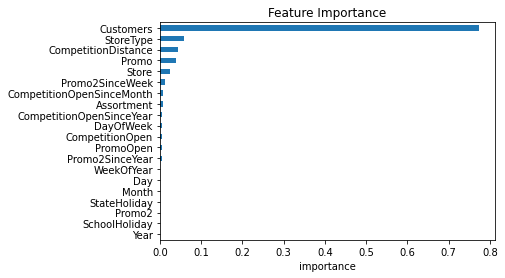

In [26]:
# plot feature importance for random forest model, show top 10 features
feat_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
feat_importances.sort_values(ascending = True).plot(kind='barh')
plt.xlabel('importance')
plt.title('Feature Importance')

In [27]:
# Upload to wandb
data = [[label, val] for (label, val) in zip(X_train.columns, clf.feature_importances_)]
table = wandb.Table(data=data, columns = ["Feature", "Importance"])
wandb.log({"Feature Importance" : wandb.plot.bar(table, "Feature", "Importance", title="Feature Importance")})

In [28]:
import wandb
from wandb.xgboost import wandb_callback
wandb_config = {
    "Model": "XgBoost with Customers"
}
wandb.init(project="mynt-rossmann",name="XGBoost-2020-10-27")

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


wandb: ERROR Control-C detected -- Run data was not synced


In [29]:
import xgboost as xgb

params = {"objective": "reg:squarederror", # for linear regression
          "booster" : "gbtree",   # use tree based models 
          "eta": 0.03,   # learning rate
          "max_depth": 8,    # maximum depth of a tree
          "subsample": 0.9,    # Subsample ratio of the training instances
          "colsample_bytree": 0.7,   # Subsample ratio of columns when constructing each tree
          "seed": 10   # Random number seed
          }
num_boost_round = 4000

dtrain = xgb.DMatrix(X_train, y_train)
dvalid = xgb.DMatrix(X_val, y_val)
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
# train the xgboost model
model = xgb.train(params, dtrain, num_boost_round, evals=watchlist, \
  early_stopping_rounds= 100, feval=rmspe_xg, verbose_eval=True, callbacks=[wandb.xgboost.wandb_callback()])

[0]	train-rmse:8.00334	eval-rmse:8.04698	train-rmspe:0.99981	eval-rmspe:0.99982
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 100 rounds.
[1]	train-rmse:7.76376	eval-rmse:7.80678	train-rmspe:0.99971	eval-rmspe:0.99972
[2]	train-rmse:7.53098	eval-rmse:7.57337	train-rmspe:0.99959	eval-rmspe:0.99960
[3]	train-rmse:7.30525	eval-rmse:7.34705	train-rmspe:0.99944	eval-rmspe:0.99946
[4]	train-rmse:7.08663	eval-rmse:7.12800	train-rmspe:0.99926	eval-rmspe:0.99929
[5]	train-rmse:6.87417	eval-rmse:6.91495	train-rmspe:0.99905	eval-rmspe:0.99909
[6]	train-rmse:6.66847	eval-rmse:6.70905	train-rmspe:0.99879	eval-rmspe:0.99884
[7]	train-rmse:6.46859	eval-rmse:6.50854	train-rmspe:0.99849	eval-rmspe:0.99855
[8]	train-rmse:6.27471	eval-rmse:6.31422	train-rmspe:0.99814	eval-rmspe:0.99821
[9]	train-rmse:6.08662	eval-rmse:6.12562	train-rmspe:0.99773	eval-rmspe:0.99782
[10]	train-rmse:5.90450	eval-rmse:5.94288	train-rmspe:

[100]	train-rmse:0.40086	eval-rmse:0.41820	train-rmspe:0.32324	eval-rmspe:0.33471
[101]	train-rmse:0.38994	eval-rmse:0.40701	train-rmspe:0.31588	eval-rmspe:0.32728
[102]	train-rmse:0.37930	eval-rmse:0.39630	train-rmspe:0.30866	eval-rmspe:0.32013
[103]	train-rmse:0.36910	eval-rmse:0.38589	train-rmspe:0.30164	eval-rmspe:0.31307
[104]	train-rmse:0.35910	eval-rmse:0.37584	train-rmspe:0.29473	eval-rmspe:0.30623
[105]	train-rmse:0.34956	eval-rmse:0.36621	train-rmspe:0.28805	eval-rmspe:0.29958
[106]	train-rmse:0.34020	eval-rmse:0.35679	train-rmspe:0.28146	eval-rmspe:0.29306
[107]	train-rmse:0.33116	eval-rmse:0.34769	train-rmspe:0.27504	eval-rmspe:0.28669
[108]	train-rmse:0.32250	eval-rmse:0.33887	train-rmspe:0.26883	eval-rmspe:0.28045
[109]	train-rmse:0.31401	eval-rmse:0.33032	train-rmspe:0.26271	eval-rmspe:0.27438
[110]	train-rmse:0.30596	eval-rmse:0.32199	train-rmspe:0.25683	eval-rmspe:0.26839
[111]	train-rmse:0.29803	eval-rmse:0.31400	train-rmspe:0.25104	eval-rmspe:0.26263
[112]	train-rmse

[200]	train-rmse:0.09855	eval-rmse:0.10650	train-rmspe:0.09672	eval-rmspe:0.10298
[201]	train-rmse:0.09827	eval-rmse:0.10617	train-rmspe:0.09651	eval-rmspe:0.10274
[202]	train-rmse:0.09801	eval-rmse:0.10586	train-rmspe:0.09631	eval-rmspe:0.10251
[203]	train-rmse:0.09770	eval-rmse:0.10552	train-rmspe:0.09607	eval-rmspe:0.10225
[204]	train-rmse:0.09745	eval-rmse:0.10520	train-rmspe:0.09588	eval-rmspe:0.10199
[205]	train-rmse:0.09726	eval-rmse:0.10495	train-rmspe:0.09574	eval-rmspe:0.10182
[206]	train-rmse:0.09688	eval-rmse:0.10456	train-rmspe:0.09542	eval-rmspe:0.10149
[207]	train-rmse:0.09668	eval-rmse:0.10432	train-rmspe:0.09528	eval-rmspe:0.10132
[208]	train-rmse:0.09644	eval-rmse:0.10403	train-rmspe:0.09508	eval-rmspe:0.10110
[209]	train-rmse:0.09628	eval-rmse:0.10380	train-rmspe:0.09498	eval-rmspe:0.10094
[210]	train-rmse:0.09608	eval-rmse:0.10357	train-rmspe:0.09483	eval-rmspe:0.10077
[211]	train-rmse:0.09589	eval-rmse:0.10333	train-rmspe:0.09470	eval-rmspe:0.10060
[212]	train-rmse

[300]	train-rmse:0.08425	eval-rmse:0.09140	train-rmspe:0.08422	eval-rmspe:0.09048
[301]	train-rmse:0.08417	eval-rmse:0.09133	train-rmspe:0.08414	eval-rmspe:0.09042
[302]	train-rmse:0.08405	eval-rmse:0.09122	train-rmspe:0.08402	eval-rmspe:0.09031
[303]	train-rmse:0.08395	eval-rmse:0.09113	train-rmspe:0.08392	eval-rmspe:0.09022
[304]	train-rmse:0.08393	eval-rmse:0.09111	train-rmspe:0.08389	eval-rmspe:0.09022
[305]	train-rmse:0.08383	eval-rmse:0.09101	train-rmspe:0.08380	eval-rmspe:0.09012
[306]	train-rmse:0.08378	eval-rmse:0.09102	train-rmspe:0.08374	eval-rmspe:0.09013
[307]	train-rmse:0.08371	eval-rmse:0.09096	train-rmspe:0.08367	eval-rmspe:0.09007
[308]	train-rmse:0.08367	eval-rmse:0.09096	train-rmspe:0.08363	eval-rmspe:0.09009
[309]	train-rmse:0.08356	eval-rmse:0.09086	train-rmspe:0.08351	eval-rmspe:0.08999
[310]	train-rmse:0.08327	eval-rmse:0.09058	train-rmspe:0.08321	eval-rmspe:0.08969
[311]	train-rmse:0.08306	eval-rmse:0.09039	train-rmspe:0.08299	eval-rmspe:0.08950
[312]	train-rmse

[400]	train-rmse:0.07493	eval-rmse:0.08353	train-rmspe:0.07457	eval-rmspe:0.08265
[401]	train-rmse:0.07480	eval-rmse:0.08344	train-rmspe:0.07443	eval-rmspe:0.08256
[402]	train-rmse:0.07478	eval-rmse:0.08343	train-rmspe:0.07442	eval-rmspe:0.08255
[403]	train-rmse:0.07474	eval-rmse:0.08339	train-rmspe:0.07437	eval-rmspe:0.08251
[404]	train-rmse:0.07470	eval-rmse:0.08336	train-rmspe:0.07432	eval-rmspe:0.08248
[405]	train-rmse:0.07468	eval-rmse:0.08334	train-rmspe:0.07431	eval-rmspe:0.08247
[406]	train-rmse:0.07447	eval-rmse:0.08320	train-rmspe:0.07410	eval-rmspe:0.08233
[407]	train-rmse:0.07445	eval-rmse:0.08320	train-rmspe:0.07408	eval-rmspe:0.08232
[408]	train-rmse:0.07432	eval-rmse:0.08306	train-rmspe:0.07394	eval-rmspe:0.08219
[409]	train-rmse:0.07420	eval-rmse:0.08297	train-rmspe:0.07382	eval-rmspe:0.08210
[410]	train-rmse:0.07410	eval-rmse:0.08288	train-rmspe:0.07371	eval-rmspe:0.08200
[411]	train-rmse:0.07389	eval-rmse:0.08271	train-rmspe:0.07350	eval-rmspe:0.08183
[412]	train-rmse

[500]	train-rmse:0.06785	eval-rmse:0.07742	train-rmspe:0.06729	eval-rmspe:0.07654
[501]	train-rmse:0.06772	eval-rmse:0.07731	train-rmspe:0.06715	eval-rmspe:0.07643
[502]	train-rmse:0.06768	eval-rmse:0.07729	train-rmspe:0.06712	eval-rmspe:0.07641
[503]	train-rmse:0.06762	eval-rmse:0.07723	train-rmspe:0.06705	eval-rmspe:0.07636
[504]	train-rmse:0.06749	eval-rmse:0.07713	train-rmspe:0.06692	eval-rmspe:0.07625
[505]	train-rmse:0.06742	eval-rmse:0.07707	train-rmspe:0.06684	eval-rmspe:0.07619
[506]	train-rmse:0.06732	eval-rmse:0.07698	train-rmspe:0.06674	eval-rmspe:0.07610
[507]	train-rmse:0.06723	eval-rmse:0.07690	train-rmspe:0.06665	eval-rmspe:0.07602
[508]	train-rmse:0.06720	eval-rmse:0.07689	train-rmspe:0.06661	eval-rmspe:0.07601
[509]	train-rmse:0.06714	eval-rmse:0.07684	train-rmspe:0.06655	eval-rmspe:0.07597
[510]	train-rmse:0.06705	eval-rmse:0.07676	train-rmspe:0.06646	eval-rmspe:0.07589
[511]	train-rmse:0.06698	eval-rmse:0.07670	train-rmspe:0.06638	eval-rmspe:0.07582
[512]	train-rmse

[600]	train-rmse:0.06315	eval-rmse:0.07352	train-rmspe:0.06247	eval-rmspe:0.07261
[601]	train-rmse:0.06312	eval-rmse:0.07351	train-rmspe:0.06245	eval-rmspe:0.07259
[602]	train-rmse:0.06310	eval-rmse:0.07348	train-rmspe:0.06242	eval-rmspe:0.07257
[603]	train-rmse:0.06304	eval-rmse:0.07343	train-rmspe:0.06237	eval-rmspe:0.07251
[604]	train-rmse:0.06302	eval-rmse:0.07341	train-rmspe:0.06235	eval-rmspe:0.07250
[605]	train-rmse:0.06294	eval-rmse:0.07336	train-rmspe:0.06227	eval-rmspe:0.07244
[606]	train-rmse:0.06291	eval-rmse:0.07329	train-rmspe:0.06224	eval-rmspe:0.07238
[607]	train-rmse:0.06286	eval-rmse:0.07326	train-rmspe:0.06218	eval-rmspe:0.07235
[608]	train-rmse:0.06285	eval-rmse:0.07326	train-rmspe:0.06217	eval-rmspe:0.07235
[609]	train-rmse:0.06280	eval-rmse:0.07322	train-rmspe:0.06212	eval-rmspe:0.07231
[610]	train-rmse:0.06279	eval-rmse:0.07321	train-rmspe:0.06211	eval-rmspe:0.07230
[611]	train-rmse:0.06273	eval-rmse:0.07316	train-rmspe:0.06205	eval-rmspe:0.07225
[612]	train-rmse

[700]	train-rmse:0.05995	eval-rmse:0.07098	train-rmspe:0.05922	eval-rmspe:0.07004
[701]	train-rmse:0.05990	eval-rmse:0.07093	train-rmspe:0.05916	eval-rmspe:0.06999
[702]	train-rmse:0.05989	eval-rmse:0.07093	train-rmspe:0.05915	eval-rmspe:0.06998
[703]	train-rmse:0.05987	eval-rmse:0.07092	train-rmspe:0.05914	eval-rmspe:0.06998
[704]	train-rmse:0.05985	eval-rmse:0.07091	train-rmspe:0.05912	eval-rmspe:0.06997
[705]	train-rmse:0.05983	eval-rmse:0.07089	train-rmspe:0.05909	eval-rmspe:0.06995
[706]	train-rmse:0.05980	eval-rmse:0.07086	train-rmspe:0.05906	eval-rmspe:0.06992
[707]	train-rmse:0.05975	eval-rmse:0.07082	train-rmspe:0.05902	eval-rmspe:0.06988
[708]	train-rmse:0.05973	eval-rmse:0.07081	train-rmspe:0.05900	eval-rmspe:0.06987
[709]	train-rmse:0.05971	eval-rmse:0.07079	train-rmspe:0.05898	eval-rmspe:0.06985
[710]	train-rmse:0.05969	eval-rmse:0.07078	train-rmspe:0.05895	eval-rmspe:0.06984
[711]	train-rmse:0.05968	eval-rmse:0.07077	train-rmspe:0.05895	eval-rmspe:0.06983
[712]	train-rmse

[800]	train-rmse:0.05753	eval-rmse:0.06906	train-rmspe:0.05678	eval-rmspe:0.06812
[801]	train-rmse:0.05750	eval-rmse:0.06903	train-rmspe:0.05674	eval-rmspe:0.06809
[802]	train-rmse:0.05745	eval-rmse:0.06900	train-rmspe:0.05670	eval-rmspe:0.06805
[803]	train-rmse:0.05741	eval-rmse:0.06897	train-rmspe:0.05666	eval-rmspe:0.06803
[804]	train-rmse:0.05741	eval-rmse:0.06897	train-rmspe:0.05665	eval-rmspe:0.06802
[805]	train-rmse:0.05740	eval-rmse:0.06896	train-rmspe:0.05665	eval-rmspe:0.06802
[806]	train-rmse:0.05739	eval-rmse:0.06896	train-rmspe:0.05664	eval-rmspe:0.06802
[807]	train-rmse:0.05738	eval-rmse:0.06896	train-rmspe:0.05663	eval-rmspe:0.06802
[808]	train-rmse:0.05735	eval-rmse:0.06894	train-rmspe:0.05660	eval-rmspe:0.06800
[809]	train-rmse:0.05732	eval-rmse:0.06892	train-rmspe:0.05656	eval-rmspe:0.06797
[810]	train-rmse:0.05730	eval-rmse:0.06891	train-rmspe:0.05655	eval-rmspe:0.06797
[811]	train-rmse:0.05730	eval-rmse:0.06891	train-rmspe:0.05655	eval-rmspe:0.06797
[812]	train-rmse

[900]	train-rmse:0.05575	eval-rmse:0.06782	train-rmspe:0.05500	eval-rmspe:0.06685
[901]	train-rmse:0.05575	eval-rmse:0.06782	train-rmspe:0.05499	eval-rmspe:0.06685
[902]	train-rmse:0.05573	eval-rmse:0.06780	train-rmspe:0.05498	eval-rmspe:0.06683
[903]	train-rmse:0.05571	eval-rmse:0.06779	train-rmspe:0.05496	eval-rmspe:0.06682
[904]	train-rmse:0.05570	eval-rmse:0.06778	train-rmspe:0.05495	eval-rmspe:0.06681
[905]	train-rmse:0.05566	eval-rmse:0.06775	train-rmspe:0.05490	eval-rmspe:0.06678
[906]	train-rmse:0.05565	eval-rmse:0.06775	train-rmspe:0.05489	eval-rmspe:0.06678
[907]	train-rmse:0.05562	eval-rmse:0.06773	train-rmspe:0.05487	eval-rmspe:0.06675
[908]	train-rmse:0.05561	eval-rmse:0.06772	train-rmspe:0.05486	eval-rmspe:0.06675
[909]	train-rmse:0.05560	eval-rmse:0.06771	train-rmspe:0.05485	eval-rmspe:0.06674
[910]	train-rmse:0.05559	eval-rmse:0.06771	train-rmspe:0.05484	eval-rmspe:0.06674
[911]	train-rmse:0.05557	eval-rmse:0.06769	train-rmspe:0.05482	eval-rmspe:0.06672
[912]	train-rmse

[1000]	train-rmse:0.05448	eval-rmse:0.06697	train-rmspe:0.05374	eval-rmspe:0.06600
[1001]	train-rmse:0.05447	eval-rmse:0.06697	train-rmspe:0.05373	eval-rmspe:0.06600
[1002]	train-rmse:0.05446	eval-rmse:0.06696	train-rmspe:0.05372	eval-rmspe:0.06599
[1003]	train-rmse:0.05445	eval-rmse:0.06696	train-rmspe:0.05371	eval-rmspe:0.06599
[1004]	train-rmse:0.05445	eval-rmse:0.06695	train-rmspe:0.05370	eval-rmspe:0.06598
[1005]	train-rmse:0.05444	eval-rmse:0.06695	train-rmspe:0.05369	eval-rmspe:0.06598
[1006]	train-rmse:0.05443	eval-rmse:0.06694	train-rmspe:0.05368	eval-rmspe:0.06597
[1007]	train-rmse:0.05442	eval-rmse:0.06694	train-rmspe:0.05368	eval-rmspe:0.06597
[1008]	train-rmse:0.05440	eval-rmse:0.06693	train-rmspe:0.05366	eval-rmspe:0.06596
[1009]	train-rmse:0.05440	eval-rmse:0.06693	train-rmspe:0.05366	eval-rmspe:0.06596
[1010]	train-rmse:0.05439	eval-rmse:0.06692	train-rmspe:0.05365	eval-rmspe:0.06595
[1011]	train-rmse:0.05436	eval-rmse:0.06690	train-rmspe:0.05362	eval-rmspe:0.06593
[101

[1099]	train-rmse:0.05334	eval-rmse:0.06618	train-rmspe:0.05261	eval-rmspe:0.06520
[1100]	train-rmse:0.05333	eval-rmse:0.06618	train-rmspe:0.05260	eval-rmspe:0.06520
[1101]	train-rmse:0.05331	eval-rmse:0.06616	train-rmspe:0.05258	eval-rmspe:0.06518
[1102]	train-rmse:0.05330	eval-rmse:0.06615	train-rmspe:0.05257	eval-rmspe:0.06517
[1103]	train-rmse:0.05329	eval-rmse:0.06615	train-rmspe:0.05256	eval-rmspe:0.06517
[1104]	train-rmse:0.05327	eval-rmse:0.06614	train-rmspe:0.05255	eval-rmspe:0.06516
[1105]	train-rmse:0.05326	eval-rmse:0.06613	train-rmspe:0.05253	eval-rmspe:0.06515
[1106]	train-rmse:0.05326	eval-rmse:0.06613	train-rmspe:0.05253	eval-rmspe:0.06515
[1107]	train-rmse:0.05325	eval-rmse:0.06612	train-rmspe:0.05252	eval-rmspe:0.06514
[1108]	train-rmse:0.05324	eval-rmse:0.06612	train-rmspe:0.05251	eval-rmspe:0.06513
[1109]	train-rmse:0.05323	eval-rmse:0.06611	train-rmspe:0.05250	eval-rmspe:0.06513
[1110]	train-rmse:0.05322	eval-rmse:0.06611	train-rmspe:0.05249	eval-rmspe:0.06512
[111

[1198]	train-rmse:0.05240	eval-rmse:0.06566	train-rmspe:0.05170	eval-rmspe:0.06466
[1199]	train-rmse:0.05237	eval-rmse:0.06564	train-rmspe:0.05168	eval-rmspe:0.06464
[1200]	train-rmse:0.05237	eval-rmse:0.06563	train-rmspe:0.05167	eval-rmspe:0.06463
[1201]	train-rmse:0.05236	eval-rmse:0.06563	train-rmspe:0.05167	eval-rmspe:0.06463
[1202]	train-rmse:0.05235	eval-rmse:0.06562	train-rmspe:0.05165	eval-rmspe:0.06462
[1203]	train-rmse:0.05233	eval-rmse:0.06561	train-rmspe:0.05164	eval-rmspe:0.06461
[1204]	train-rmse:0.05232	eval-rmse:0.06559	train-rmspe:0.05162	eval-rmspe:0.06459
[1205]	train-rmse:0.05231	eval-rmse:0.06559	train-rmspe:0.05161	eval-rmspe:0.06459
[1206]	train-rmse:0.05230	eval-rmse:0.06559	train-rmspe:0.05161	eval-rmspe:0.06459
[1207]	train-rmse:0.05230	eval-rmse:0.06558	train-rmspe:0.05160	eval-rmspe:0.06458
[1208]	train-rmse:0.05228	eval-rmse:0.06557	train-rmspe:0.05158	eval-rmspe:0.06457
[1209]	train-rmse:0.05227	eval-rmse:0.06556	train-rmspe:0.05157	eval-rmspe:0.06456
[121

[1297]	train-rmse:0.05158	eval-rmse:0.06510	train-rmspe:0.05089	eval-rmspe:0.06411
[1298]	train-rmse:0.05157	eval-rmse:0.06510	train-rmspe:0.05088	eval-rmspe:0.06411
[1299]	train-rmse:0.05157	eval-rmse:0.06510	train-rmspe:0.05088	eval-rmspe:0.06411
[1300]	train-rmse:0.05156	eval-rmse:0.06510	train-rmspe:0.05087	eval-rmspe:0.06411
[1301]	train-rmse:0.05156	eval-rmse:0.06510	train-rmspe:0.05087	eval-rmspe:0.06411
[1302]	train-rmse:0.05155	eval-rmse:0.06510	train-rmspe:0.05086	eval-rmspe:0.06411
[1303]	train-rmse:0.05154	eval-rmse:0.06509	train-rmspe:0.05085	eval-rmspe:0.06410
[1304]	train-rmse:0.05153	eval-rmse:0.06508	train-rmspe:0.05084	eval-rmspe:0.06409
[1305]	train-rmse:0.05153	eval-rmse:0.06508	train-rmspe:0.05083	eval-rmspe:0.06409
[1306]	train-rmse:0.05151	eval-rmse:0.06507	train-rmspe:0.05083	eval-rmspe:0.06409
[1307]	train-rmse:0.05151	eval-rmse:0.06507	train-rmspe:0.05082	eval-rmspe:0.06408
[1308]	train-rmse:0.05150	eval-rmse:0.06507	train-rmspe:0.05081	eval-rmspe:0.06408
[130

[1396]	train-rmse:0.05089	eval-rmse:0.06477	train-rmspe:0.05022	eval-rmspe:0.06379
[1397]	train-rmse:0.05088	eval-rmse:0.06477	train-rmspe:0.05021	eval-rmspe:0.06378
[1398]	train-rmse:0.05088	eval-rmse:0.06476	train-rmspe:0.05020	eval-rmspe:0.06378
[1399]	train-rmse:0.05087	eval-rmse:0.06476	train-rmspe:0.05020	eval-rmspe:0.06378
[1400]	train-rmse:0.05086	eval-rmse:0.06475	train-rmspe:0.05019	eval-rmspe:0.06377
[1401]	train-rmse:0.05085	eval-rmse:0.06475	train-rmspe:0.05018	eval-rmspe:0.06377
[1402]	train-rmse:0.05085	eval-rmse:0.06475	train-rmspe:0.05017	eval-rmspe:0.06377
[1403]	train-rmse:0.05083	eval-rmse:0.06474	train-rmspe:0.05016	eval-rmspe:0.06376
[1404]	train-rmse:0.05083	eval-rmse:0.06474	train-rmspe:0.05015	eval-rmspe:0.06375
[1405]	train-rmse:0.05082	eval-rmse:0.06473	train-rmspe:0.05014	eval-rmspe:0.06375
[1406]	train-rmse:0.05081	eval-rmse:0.06473	train-rmspe:0.05014	eval-rmspe:0.06374
[1407]	train-rmse:0.05081	eval-rmse:0.06473	train-rmspe:0.05013	eval-rmspe:0.06374
[140

[1495]	train-rmse:0.05026	eval-rmse:0.06450	train-rmspe:0.04962	eval-rmspe:0.06351
[1496]	train-rmse:0.05025	eval-rmse:0.06450	train-rmspe:0.04961	eval-rmspe:0.06351
[1497]	train-rmse:0.05024	eval-rmse:0.06450	train-rmspe:0.04961	eval-rmspe:0.06351
[1498]	train-rmse:0.05024	eval-rmse:0.06449	train-rmspe:0.04960	eval-rmspe:0.06350
[1499]	train-rmse:0.05024	eval-rmse:0.06449	train-rmspe:0.04960	eval-rmspe:0.06350
[1500]	train-rmse:0.05023	eval-rmse:0.06449	train-rmspe:0.04959	eval-rmspe:0.06350
[1501]	train-rmse:0.05022	eval-rmse:0.06448	train-rmspe:0.04958	eval-rmspe:0.06349
[1502]	train-rmse:0.05022	eval-rmse:0.06448	train-rmspe:0.04958	eval-rmspe:0.06349
[1503]	train-rmse:0.05021	eval-rmse:0.06448	train-rmspe:0.04957	eval-rmspe:0.06348
[1504]	train-rmse:0.05020	eval-rmse:0.06447	train-rmspe:0.04956	eval-rmspe:0.06348
[1505]	train-rmse:0.05019	eval-rmse:0.06447	train-rmspe:0.04955	eval-rmspe:0.06348
[1506]	train-rmse:0.05018	eval-rmse:0.06446	train-rmspe:0.04954	eval-rmspe:0.06347
[150

[1594]	train-rmse:0.04964	eval-rmse:0.06424	train-rmspe:0.04903	eval-rmspe:0.06326
[1595]	train-rmse:0.04964	eval-rmse:0.06424	train-rmspe:0.04902	eval-rmspe:0.06326
[1596]	train-rmse:0.04963	eval-rmse:0.06424	train-rmspe:0.04902	eval-rmspe:0.06325
[1597]	train-rmse:0.04963	eval-rmse:0.06424	train-rmspe:0.04902	eval-rmspe:0.06325
[1598]	train-rmse:0.04963	eval-rmse:0.06424	train-rmspe:0.04901	eval-rmspe:0.06325
[1599]	train-rmse:0.04962	eval-rmse:0.06424	train-rmspe:0.04901	eval-rmspe:0.06325
[1600]	train-rmse:0.04961	eval-rmse:0.06424	train-rmspe:0.04900	eval-rmspe:0.06325
[1601]	train-rmse:0.04961	eval-rmse:0.06424	train-rmspe:0.04900	eval-rmspe:0.06325
[1602]	train-rmse:0.04960	eval-rmse:0.06424	train-rmspe:0.04899	eval-rmspe:0.06325
[1603]	train-rmse:0.04959	eval-rmse:0.06424	train-rmspe:0.04898	eval-rmspe:0.06325
[1604]	train-rmse:0.04959	eval-rmse:0.06424	train-rmspe:0.04898	eval-rmspe:0.06325
[1605]	train-rmse:0.04958	eval-rmse:0.06423	train-rmspe:0.04897	eval-rmspe:0.06324
[160

[1693]	train-rmse:0.04916	eval-rmse:0.06410	train-rmspe:0.04857	eval-rmspe:0.06311
[1694]	train-rmse:0.04916	eval-rmse:0.06409	train-rmspe:0.04856	eval-rmspe:0.06311
[1695]	train-rmse:0.04916	eval-rmse:0.06409	train-rmspe:0.04856	eval-rmspe:0.06311
[1696]	train-rmse:0.04915	eval-rmse:0.06410	train-rmspe:0.04856	eval-rmspe:0.06311
[1697]	train-rmse:0.04915	eval-rmse:0.06409	train-rmspe:0.04856	eval-rmspe:0.06311
[1698]	train-rmse:0.04915	eval-rmse:0.06409	train-rmspe:0.04855	eval-rmspe:0.06310
[1699]	train-rmse:0.04915	eval-rmse:0.06409	train-rmspe:0.04855	eval-rmspe:0.06310
[1700]	train-rmse:0.04914	eval-rmse:0.06409	train-rmspe:0.04855	eval-rmspe:0.06310
[1701]	train-rmse:0.04914	eval-rmse:0.06408	train-rmspe:0.04854	eval-rmspe:0.06310
[1702]	train-rmse:0.04913	eval-rmse:0.06408	train-rmspe:0.04854	eval-rmspe:0.06310
[1703]	train-rmse:0.04913	eval-rmse:0.06408	train-rmspe:0.04853	eval-rmspe:0.06310
[1704]	train-rmse:0.04912	eval-rmse:0.06408	train-rmspe:0.04853	eval-rmspe:0.06309
[170

[1792]	train-rmse:0.04870	eval-rmse:0.06391	train-rmspe:0.04813	eval-rmspe:0.06294
[1793]	train-rmse:0.04869	eval-rmse:0.06391	train-rmspe:0.04812	eval-rmspe:0.06294
[1794]	train-rmse:0.04869	eval-rmse:0.06391	train-rmspe:0.04812	eval-rmspe:0.06295
[1795]	train-rmse:0.04868	eval-rmse:0.06391	train-rmspe:0.04811	eval-rmspe:0.06295
[1796]	train-rmse:0.04868	eval-rmse:0.06392	train-rmspe:0.04811	eval-rmspe:0.06295
[1797]	train-rmse:0.04868	eval-rmse:0.06392	train-rmspe:0.04811	eval-rmspe:0.06295
[1798]	train-rmse:0.04867	eval-rmse:0.06392	train-rmspe:0.04810	eval-rmspe:0.06295
[1799]	train-rmse:0.04867	eval-rmse:0.06392	train-rmspe:0.04810	eval-rmspe:0.06295
[1800]	train-rmse:0.04866	eval-rmse:0.06392	train-rmspe:0.04810	eval-rmspe:0.06295
[1801]	train-rmse:0.04866	eval-rmse:0.06392	train-rmspe:0.04809	eval-rmspe:0.06295
[1802]	train-rmse:0.04865	eval-rmse:0.06392	train-rmspe:0.04809	eval-rmspe:0.06295
[1803]	train-rmse:0.04865	eval-rmse:0.06392	train-rmspe:0.04808	eval-rmspe:0.06295
[180

[1891]	train-rmse:0.04827	eval-rmse:0.06377	train-rmspe:0.04772	eval-rmspe:0.06281
[1892]	train-rmse:0.04826	eval-rmse:0.06377	train-rmspe:0.04771	eval-rmspe:0.06280
[1893]	train-rmse:0.04826	eval-rmse:0.06376	train-rmspe:0.04771	eval-rmspe:0.06280
[1894]	train-rmse:0.04826	eval-rmse:0.06376	train-rmspe:0.04771	eval-rmspe:0.06280
[1895]	train-rmse:0.04825	eval-rmse:0.06376	train-rmspe:0.04770	eval-rmspe:0.06280
[1896]	train-rmse:0.04825	eval-rmse:0.06376	train-rmspe:0.04770	eval-rmspe:0.06279
[1897]	train-rmse:0.04824	eval-rmse:0.06376	train-rmspe:0.04770	eval-rmspe:0.06280
[1898]	train-rmse:0.04824	eval-rmse:0.06376	train-rmspe:0.04769	eval-rmspe:0.06280
[1899]	train-rmse:0.04824	eval-rmse:0.06376	train-rmspe:0.04769	eval-rmspe:0.06279
[1900]	train-rmse:0.04823	eval-rmse:0.06375	train-rmspe:0.04768	eval-rmspe:0.06279
[1901]	train-rmse:0.04823	eval-rmse:0.06375	train-rmspe:0.04768	eval-rmspe:0.06279
[1902]	train-rmse:0.04822	eval-rmse:0.06375	train-rmspe:0.04767	eval-rmspe:0.06279
[190

[1990]	train-rmse:0.04788	eval-rmse:0.06365	train-rmspe:0.04734	eval-rmspe:0.06270
[1991]	train-rmse:0.04787	eval-rmse:0.06365	train-rmspe:0.04734	eval-rmspe:0.06270
[1992]	train-rmse:0.04787	eval-rmse:0.06364	train-rmspe:0.04733	eval-rmspe:0.06270
[1993]	train-rmse:0.04786	eval-rmse:0.06364	train-rmspe:0.04733	eval-rmspe:0.06269
[1994]	train-rmse:0.04786	eval-rmse:0.06364	train-rmspe:0.04733	eval-rmspe:0.06269
[1995]	train-rmse:0.04786	eval-rmse:0.06364	train-rmspe:0.04732	eval-rmspe:0.06269
[1996]	train-rmse:0.04785	eval-rmse:0.06363	train-rmspe:0.04732	eval-rmspe:0.06269
[1997]	train-rmse:0.04785	eval-rmse:0.06363	train-rmspe:0.04731	eval-rmspe:0.06269
[1998]	train-rmse:0.04784	eval-rmse:0.06363	train-rmspe:0.04731	eval-rmspe:0.06269
[1999]	train-rmse:0.04784	eval-rmse:0.06363	train-rmspe:0.04730	eval-rmspe:0.06268
[2000]	train-rmse:0.04783	eval-rmse:0.06363	train-rmspe:0.04730	eval-rmspe:0.06268
[2001]	train-rmse:0.04783	eval-rmse:0.06363	train-rmspe:0.04729	eval-rmspe:0.06268
[200

[2089]	train-rmse:0.04750	eval-rmse:0.06353	train-rmspe:0.04697	eval-rmspe:0.06259
[2090]	train-rmse:0.04749	eval-rmse:0.06353	train-rmspe:0.04697	eval-rmspe:0.06259
[2091]	train-rmse:0.04749	eval-rmse:0.06353	train-rmspe:0.04697	eval-rmspe:0.06259
[2092]	train-rmse:0.04748	eval-rmse:0.06353	train-rmspe:0.04696	eval-rmspe:0.06259
[2093]	train-rmse:0.04748	eval-rmse:0.06354	train-rmspe:0.04696	eval-rmspe:0.06259
[2094]	train-rmse:0.04748	eval-rmse:0.06353	train-rmspe:0.04695	eval-rmspe:0.06259
[2095]	train-rmse:0.04747	eval-rmse:0.06353	train-rmspe:0.04695	eval-rmspe:0.06259
[2096]	train-rmse:0.04747	eval-rmse:0.06354	train-rmspe:0.04695	eval-rmspe:0.06259
[2097]	train-rmse:0.04747	eval-rmse:0.06354	train-rmspe:0.04694	eval-rmspe:0.06259
[2098]	train-rmse:0.04746	eval-rmse:0.06353	train-rmspe:0.04694	eval-rmspe:0.06259
[2099]	train-rmse:0.04746	eval-rmse:0.06353	train-rmspe:0.04694	eval-rmspe:0.06259
[2100]	train-rmse:0.04746	eval-rmse:0.06353	train-rmspe:0.04693	eval-rmspe:0.06258
[210

[2188]	train-rmse:0.04714	eval-rmse:0.06347	train-rmspe:0.04663	eval-rmspe:0.06252
[2189]	train-rmse:0.04714	eval-rmse:0.06346	train-rmspe:0.04663	eval-rmspe:0.06252
[2190]	train-rmse:0.04713	eval-rmse:0.06346	train-rmspe:0.04663	eval-rmspe:0.06252
[2191]	train-rmse:0.04713	eval-rmse:0.06346	train-rmspe:0.04662	eval-rmspe:0.06252
[2192]	train-rmse:0.04713	eval-rmse:0.06346	train-rmspe:0.04662	eval-rmspe:0.06252
[2193]	train-rmse:0.04712	eval-rmse:0.06346	train-rmspe:0.04661	eval-rmspe:0.06251
[2194]	train-rmse:0.04711	eval-rmse:0.06345	train-rmspe:0.04661	eval-rmspe:0.06251
[2195]	train-rmse:0.04711	eval-rmse:0.06345	train-rmspe:0.04661	eval-rmspe:0.06251
[2196]	train-rmse:0.04711	eval-rmse:0.06345	train-rmspe:0.04660	eval-rmspe:0.06251
[2197]	train-rmse:0.04711	eval-rmse:0.06345	train-rmspe:0.04660	eval-rmspe:0.06251
[2198]	train-rmse:0.04710	eval-rmse:0.06345	train-rmspe:0.04659	eval-rmspe:0.06251
[2199]	train-rmse:0.04710	eval-rmse:0.06345	train-rmspe:0.04659	eval-rmspe:0.06251
[220

[2287]	train-rmse:0.04678	eval-rmse:0.06340	train-rmspe:0.04630	eval-rmspe:0.06245
[2288]	train-rmse:0.04678	eval-rmse:0.06340	train-rmspe:0.04630	eval-rmspe:0.06245
[2289]	train-rmse:0.04678	eval-rmse:0.06340	train-rmspe:0.04630	eval-rmspe:0.06246
[2290]	train-rmse:0.04677	eval-rmse:0.06340	train-rmspe:0.04629	eval-rmspe:0.06246
[2291]	train-rmse:0.04677	eval-rmse:0.06340	train-rmspe:0.04629	eval-rmspe:0.06246
[2292]	train-rmse:0.04677	eval-rmse:0.06340	train-rmspe:0.04628	eval-rmspe:0.06246
[2293]	train-rmse:0.04676	eval-rmse:0.06340	train-rmspe:0.04628	eval-rmspe:0.06245
[2294]	train-rmse:0.04676	eval-rmse:0.06340	train-rmspe:0.04628	eval-rmspe:0.06245
[2295]	train-rmse:0.04676	eval-rmse:0.06340	train-rmspe:0.04628	eval-rmspe:0.06245
[2296]	train-rmse:0.04675	eval-rmse:0.06339	train-rmspe:0.04627	eval-rmspe:0.06245
[2297]	train-rmse:0.04675	eval-rmse:0.06339	train-rmspe:0.04627	eval-rmspe:0.06245
[2298]	train-rmse:0.04675	eval-rmse:0.06339	train-rmspe:0.04627	eval-rmspe:0.06245
[229

[2386]	train-rmse:0.04646	eval-rmse:0.06335	train-rmspe:0.04599	eval-rmspe:0.06241
[2387]	train-rmse:0.04646	eval-rmse:0.06335	train-rmspe:0.04599	eval-rmspe:0.06241
[2388]	train-rmse:0.04645	eval-rmse:0.06335	train-rmspe:0.04598	eval-rmspe:0.06240
[2389]	train-rmse:0.04645	eval-rmse:0.06335	train-rmspe:0.04598	eval-rmspe:0.06240
[2390]	train-rmse:0.04645	eval-rmse:0.06335	train-rmspe:0.04598	eval-rmspe:0.06240
[2391]	train-rmse:0.04644	eval-rmse:0.06334	train-rmspe:0.04597	eval-rmspe:0.06240
[2392]	train-rmse:0.04644	eval-rmse:0.06334	train-rmspe:0.04597	eval-rmspe:0.06240
[2393]	train-rmse:0.04643	eval-rmse:0.06334	train-rmspe:0.04597	eval-rmspe:0.06239
[2394]	train-rmse:0.04643	eval-rmse:0.06334	train-rmspe:0.04596	eval-rmspe:0.06239
[2395]	train-rmse:0.04643	eval-rmse:0.06334	train-rmspe:0.04596	eval-rmspe:0.06239
[2396]	train-rmse:0.04642	eval-rmse:0.06334	train-rmspe:0.04596	eval-rmspe:0.06240
[2397]	train-rmse:0.04642	eval-rmse:0.06334	train-rmspe:0.04595	eval-rmspe:0.06239
[239

[2485]	train-rmse:0.04614	eval-rmse:0.06326	train-rmspe:0.04569	eval-rmspe:0.06232
[2486]	train-rmse:0.04614	eval-rmse:0.06325	train-rmspe:0.04568	eval-rmspe:0.06232
[2487]	train-rmse:0.04613	eval-rmse:0.06325	train-rmspe:0.04568	eval-rmspe:0.06232
[2488]	train-rmse:0.04613	eval-rmse:0.06325	train-rmspe:0.04568	eval-rmspe:0.06232
[2489]	train-rmse:0.04613	eval-rmse:0.06325	train-rmspe:0.04568	eval-rmspe:0.06232
[2490]	train-rmse:0.04612	eval-rmse:0.06325	train-rmspe:0.04567	eval-rmspe:0.06232
[2491]	train-rmse:0.04612	eval-rmse:0.06325	train-rmspe:0.04567	eval-rmspe:0.06232
[2492]	train-rmse:0.04612	eval-rmse:0.06325	train-rmspe:0.04567	eval-rmspe:0.06232
[2493]	train-rmse:0.04612	eval-rmse:0.06325	train-rmspe:0.04567	eval-rmspe:0.06232
[2494]	train-rmse:0.04612	eval-rmse:0.06325	train-rmspe:0.04567	eval-rmspe:0.06232
[2495]	train-rmse:0.04611	eval-rmse:0.06325	train-rmspe:0.04566	eval-rmspe:0.06232
[2496]	train-rmse:0.04611	eval-rmse:0.06325	train-rmspe:0.04566	eval-rmspe:0.06232
[249

[2584]	train-rmse:0.04584	eval-rmse:0.06320	train-rmspe:0.04541	eval-rmspe:0.06228
[2585]	train-rmse:0.04584	eval-rmse:0.06320	train-rmspe:0.04541	eval-rmspe:0.06228
[2586]	train-rmse:0.04584	eval-rmse:0.06320	train-rmspe:0.04540	eval-rmspe:0.06228
[2587]	train-rmse:0.04583	eval-rmse:0.06319	train-rmspe:0.04540	eval-rmspe:0.06227
[2588]	train-rmse:0.04583	eval-rmse:0.06319	train-rmspe:0.04539	eval-rmspe:0.06227
[2589]	train-rmse:0.04583	eval-rmse:0.06319	train-rmspe:0.04539	eval-rmspe:0.06227
[2590]	train-rmse:0.04582	eval-rmse:0.06319	train-rmspe:0.04539	eval-rmspe:0.06227
[2591]	train-rmse:0.04582	eval-rmse:0.06319	train-rmspe:0.04538	eval-rmspe:0.06227
[2592]	train-rmse:0.04582	eval-rmse:0.06319	train-rmspe:0.04538	eval-rmspe:0.06227
[2593]	train-rmse:0.04581	eval-rmse:0.06319	train-rmspe:0.04537	eval-rmspe:0.06227
[2594]	train-rmse:0.04581	eval-rmse:0.06319	train-rmspe:0.04537	eval-rmspe:0.06227
[2595]	train-rmse:0.04580	eval-rmse:0.06319	train-rmspe:0.04537	eval-rmspe:0.06227
[259

[2683]	train-rmse:0.04555	eval-rmse:0.06316	train-rmspe:0.04513	eval-rmspe:0.06224
[2684]	train-rmse:0.04555	eval-rmse:0.06316	train-rmspe:0.04512	eval-rmspe:0.06224
[2685]	train-rmse:0.04555	eval-rmse:0.06316	train-rmspe:0.04512	eval-rmspe:0.06224
[2686]	train-rmse:0.04554	eval-rmse:0.06316	train-rmspe:0.04512	eval-rmspe:0.06224
[2687]	train-rmse:0.04554	eval-rmse:0.06316	train-rmspe:0.04512	eval-rmspe:0.06224
[2688]	train-rmse:0.04554	eval-rmse:0.06316	train-rmspe:0.04511	eval-rmspe:0.06224
[2689]	train-rmse:0.04553	eval-rmse:0.06316	train-rmspe:0.04511	eval-rmspe:0.06224
[2690]	train-rmse:0.04553	eval-rmse:0.06315	train-rmspe:0.04510	eval-rmspe:0.06224
[2691]	train-rmse:0.04553	eval-rmse:0.06315	train-rmspe:0.04510	eval-rmspe:0.06224
[2692]	train-rmse:0.04552	eval-rmse:0.06315	train-rmspe:0.04510	eval-rmspe:0.06224
[2693]	train-rmse:0.04552	eval-rmse:0.06315	train-rmspe:0.04510	eval-rmspe:0.06224
[2694]	train-rmse:0.04552	eval-rmse:0.06315	train-rmspe:0.04509	eval-rmspe:0.06223
[269

[2782]	train-rmse:0.04526	eval-rmse:0.06313	train-rmspe:0.04485	eval-rmspe:0.06221
[2783]	train-rmse:0.04526	eval-rmse:0.06313	train-rmspe:0.04485	eval-rmspe:0.06221
[2784]	train-rmse:0.04525	eval-rmse:0.06313	train-rmspe:0.04485	eval-rmspe:0.06221
[2785]	train-rmse:0.04525	eval-rmse:0.06313	train-rmspe:0.04484	eval-rmspe:0.06221
[2786]	train-rmse:0.04525	eval-rmse:0.06313	train-rmspe:0.04484	eval-rmspe:0.06221
[2787]	train-rmse:0.04524	eval-rmse:0.06313	train-rmspe:0.04483	eval-rmspe:0.06221
[2788]	train-rmse:0.04524	eval-rmse:0.06313	train-rmspe:0.04483	eval-rmspe:0.06221
[2789]	train-rmse:0.04524	eval-rmse:0.06313	train-rmspe:0.04483	eval-rmspe:0.06221
[2790]	train-rmse:0.04523	eval-rmse:0.06313	train-rmspe:0.04483	eval-rmspe:0.06221
[2791]	train-rmse:0.04523	eval-rmse:0.06313	train-rmspe:0.04482	eval-rmspe:0.06221
[2792]	train-rmse:0.04523	eval-rmse:0.06313	train-rmspe:0.04482	eval-rmspe:0.06221
[2793]	train-rmse:0.04523	eval-rmse:0.06313	train-rmspe:0.04482	eval-rmspe:0.06221
[279

[2881]	train-rmse:0.04499	eval-rmse:0.06310	train-rmspe:0.04459	eval-rmspe:0.06218
[2882]	train-rmse:0.04498	eval-rmse:0.06310	train-rmspe:0.04459	eval-rmspe:0.06218
[2883]	train-rmse:0.04498	eval-rmse:0.06309	train-rmspe:0.04458	eval-rmspe:0.06218
[2884]	train-rmse:0.04498	eval-rmse:0.06309	train-rmspe:0.04458	eval-rmspe:0.06218
[2885]	train-rmse:0.04498	eval-rmse:0.06309	train-rmspe:0.04458	eval-rmspe:0.06218
[2886]	train-rmse:0.04497	eval-rmse:0.06309	train-rmspe:0.04458	eval-rmspe:0.06218
[2887]	train-rmse:0.04497	eval-rmse:0.06309	train-rmspe:0.04457	eval-rmspe:0.06218
[2888]	train-rmse:0.04497	eval-rmse:0.06309	train-rmspe:0.04457	eval-rmspe:0.06218
[2889]	train-rmse:0.04497	eval-rmse:0.06309	train-rmspe:0.04457	eval-rmspe:0.06218
[2890]	train-rmse:0.04496	eval-rmse:0.06309	train-rmspe:0.04457	eval-rmspe:0.06218
[2891]	train-rmse:0.04496	eval-rmse:0.06309	train-rmspe:0.04457	eval-rmspe:0.06218
[2892]	train-rmse:0.04496	eval-rmse:0.06309	train-rmspe:0.04456	eval-rmspe:0.06218
[289

[2980]	train-rmse:0.04472	eval-rmse:0.06308	train-rmspe:0.04433	eval-rmspe:0.06216
[2981]	train-rmse:0.04472	eval-rmse:0.06308	train-rmspe:0.04433	eval-rmspe:0.06216
[2982]	train-rmse:0.04472	eval-rmse:0.06308	train-rmspe:0.04433	eval-rmspe:0.06216
[2983]	train-rmse:0.04471	eval-rmse:0.06308	train-rmspe:0.04433	eval-rmspe:0.06216
[2984]	train-rmse:0.04471	eval-rmse:0.06308	train-rmspe:0.04432	eval-rmspe:0.06216
[2985]	train-rmse:0.04471	eval-rmse:0.06308	train-rmspe:0.04432	eval-rmspe:0.06216
[2986]	train-rmse:0.04471	eval-rmse:0.06308	train-rmspe:0.04432	eval-rmspe:0.06216
[2987]	train-rmse:0.04471	eval-rmse:0.06308	train-rmspe:0.04432	eval-rmspe:0.06216
[2988]	train-rmse:0.04470	eval-rmse:0.06308	train-rmspe:0.04431	eval-rmspe:0.06216
[2989]	train-rmse:0.04470	eval-rmse:0.06308	train-rmspe:0.04431	eval-rmspe:0.06216
[2990]	train-rmse:0.04470	eval-rmse:0.06308	train-rmspe:0.04431	eval-rmspe:0.06216
[2991]	train-rmse:0.04470	eval-rmse:0.06308	train-rmspe:0.04431	eval-rmspe:0.06216
[299

[3079]	train-rmse:0.04447	eval-rmse:0.06305	train-rmspe:0.04409	eval-rmspe:0.06214
[3080]	train-rmse:0.04447	eval-rmse:0.06305	train-rmspe:0.04409	eval-rmspe:0.06213
[3081]	train-rmse:0.04446	eval-rmse:0.06305	train-rmspe:0.04408	eval-rmspe:0.06213
[3082]	train-rmse:0.04446	eval-rmse:0.06305	train-rmspe:0.04408	eval-rmspe:0.06213
[3083]	train-rmse:0.04446	eval-rmse:0.06305	train-rmspe:0.04408	eval-rmspe:0.06213
[3084]	train-rmse:0.04446	eval-rmse:0.06305	train-rmspe:0.04408	eval-rmspe:0.06213
[3085]	train-rmse:0.04445	eval-rmse:0.06305	train-rmspe:0.04407	eval-rmspe:0.06213
[3086]	train-rmse:0.04445	eval-rmse:0.06305	train-rmspe:0.04407	eval-rmspe:0.06213
[3087]	train-rmse:0.04445	eval-rmse:0.06304	train-rmspe:0.04407	eval-rmspe:0.06213
[3088]	train-rmse:0.04445	eval-rmse:0.06304	train-rmspe:0.04407	eval-rmspe:0.06212
[3089]	train-rmse:0.04445	eval-rmse:0.06304	train-rmspe:0.04407	eval-rmspe:0.06212
[3090]	train-rmse:0.04444	eval-rmse:0.06303	train-rmspe:0.04406	eval-rmspe:0.06212
[309

[3178]	train-rmse:0.04423	eval-rmse:0.06302	train-rmspe:0.04386	eval-rmspe:0.06211
[3179]	train-rmse:0.04423	eval-rmse:0.06302	train-rmspe:0.04386	eval-rmspe:0.06211
[3180]	train-rmse:0.04423	eval-rmse:0.06302	train-rmspe:0.04386	eval-rmspe:0.06211
[3181]	train-rmse:0.04423	eval-rmse:0.06302	train-rmspe:0.04386	eval-rmspe:0.06211
[3182]	train-rmse:0.04422	eval-rmse:0.06302	train-rmspe:0.04385	eval-rmspe:0.06211
[3183]	train-rmse:0.04422	eval-rmse:0.06302	train-rmspe:0.04385	eval-rmspe:0.06211
[3184]	train-rmse:0.04422	eval-rmse:0.06302	train-rmspe:0.04385	eval-rmspe:0.06211
[3185]	train-rmse:0.04422	eval-rmse:0.06302	train-rmspe:0.04385	eval-rmspe:0.06211
[3186]	train-rmse:0.04421	eval-rmse:0.06302	train-rmspe:0.04384	eval-rmspe:0.06211
[3187]	train-rmse:0.04421	eval-rmse:0.06302	train-rmspe:0.04384	eval-rmspe:0.06211
[3188]	train-rmse:0.04421	eval-rmse:0.06302	train-rmspe:0.04384	eval-rmspe:0.06211
[3189]	train-rmse:0.04420	eval-rmse:0.06302	train-rmspe:0.04383	eval-rmspe:0.06211
[319

[3277]	train-rmse:0.04398	eval-rmse:0.06302	train-rmspe:0.04362	eval-rmspe:0.06210
[3278]	train-rmse:0.04398	eval-rmse:0.06302	train-rmspe:0.04362	eval-rmspe:0.06210
[3279]	train-rmse:0.04398	eval-rmse:0.06302	train-rmspe:0.04362	eval-rmspe:0.06210
[3280]	train-rmse:0.04398	eval-rmse:0.06302	train-rmspe:0.04362	eval-rmspe:0.06210
[3281]	train-rmse:0.04398	eval-rmse:0.06302	train-rmspe:0.04362	eval-rmspe:0.06210
[3282]	train-rmse:0.04397	eval-rmse:0.06302	train-rmspe:0.04362	eval-rmspe:0.06210
[3283]	train-rmse:0.04397	eval-rmse:0.06302	train-rmspe:0.04361	eval-rmspe:0.06210
[3284]	train-rmse:0.04397	eval-rmse:0.06302	train-rmspe:0.04361	eval-rmspe:0.06210
[3285]	train-rmse:0.04397	eval-rmse:0.06302	train-rmspe:0.04361	eval-rmspe:0.06210
[3286]	train-rmse:0.04397	eval-rmse:0.06302	train-rmspe:0.04361	eval-rmspe:0.06210
[3287]	train-rmse:0.04396	eval-rmse:0.06302	train-rmspe:0.04361	eval-rmspe:0.06210
[3288]	train-rmse:0.04396	eval-rmse:0.06302	train-rmspe:0.04360	eval-rmspe:0.06210
[328

In [30]:
# validation
y_pred = model.predict(xgb.DMatrix(X_val))
rmspe_result = rmspe(np.expm1(y_val), np.expm1(y_pred))
print('RMSPE: {:.4f}'.format(rmspe_result))
rmse_result = mean_squared_error(np.expm1(y_val), np.expm1(y_pred), squared=False)
print('RMSE: {:.4f}'.format(rmse_result))
wandb.log({'RMSPE': rmspe_result, 'RMSE': rmse_result})

RMSPE: 0.0621
RMSE: 491.6847


In [31]:
model_fname = 'XgBoost-{:.3f}-{:.3f}.joblib'.format(rmspe_result,rmse_result)
dump(clf, model_fname) 
wandb.save(model_fname)

['wandb/run-20201027_171610-2n3fko80/files/XgBoost-0.062-491.685.joblib']